In [35]:
import pandas as pd

from pandas.io.json import json_normalize
#used this as json file has nested dictionaries

import numpy as np

#used below to parse dates in publish_time column
d_parser = lambda x : pd.datetime.strptime(x[:10]+' '+x[11:19],"%Y-%m-%d %H:%M:%S")
df = pd.read_csv('C:\Python\Project\INvideos.csv', parse_dates = ['publish_time'],date_parser = d_parser)

#was unable to use above code to parse multiple date columns with different formats, hence used below lambda function
df["trending_date"] = df["trending_date"].apply(lambda x : pd.datetime.strptime(x,"%y.%d.%m"))
df1 = pd.read_json('C:\Python\Project\IN_category_id.json')
categories = json_normalize(df1["items"])
categories["id"] = categories["id"].astype('int64')
df = pd.merge(df,categories[["id","snippet.title"]],left_on =["category_id"],right_on = ['id'], how = 'left')
df.drop(columns = ["id"],inplace = True)
df.rename(columns = {"snippet.title":"category"},inplace = True)
df["time_to_trend"] = (df["trending_date"]-df["publish_time"])
print(df.shape)
print(df1.shape)
print(categories.shape)

def dfdetails(inputdf):
    print('\033[1m'+"Dimension is \t"+ '\033[0m',inputdf.shape)
    
    print('\033[1m'+"List of columns\n"+'\033[0m',inputdf.columns)
    
    d_type = inputdf.dtypes
    print('\033[1m'+"Count of datatypes \n"'\033[0m',d_type.value_counts())
    
    na_count = inputdf.isna().sum()
    print('\033[1m'+"Non Zero NaN counts \n"'\033[0m',na_count[lambda x : x != 0])
    
    null_count = inputdf.isnull().sum()
    print('\033[1m'+"Non Zero null counts \n"'\033[0m',null_count[lambda x : x != 0])
    
    print('\033[1m'+"Data types\n"'\033[0m',inputdf.dtypes)
    
    uniq = inputdf.nunique()
    print('\033[1m'+"Top 10 Columns with largest Unique values \n"'\033[0m',uniq.nlargest(10))
   
    print('\033[1m'+"Top 10 Columns with smallest Unique values \n"'\033[0m',uniq.nsmallest(10))

    print('\033[1m'+"Unique value counts in descending order\n"'\033[0m',inputdf.nunique().sort_values(ascending=False))
    
    print('\033[1m'+"Statistics for numerics only\n"'\033[0m',inputdf.describe())
    
    #print('\033[1m'+"Statistics for all columns\n"'\033[0m',inputdf.describe(include = 'all'))
    return

dfdetails(df)

(37352, 18)
(31, 3)
(31, 6)
Dimension is 	 (37352, 18)
List of columns
 Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category', 'time_to_trend'],
      dtype='object')
Count of datatypes 
 object             7
int64              5
bool               3
datetime64[ns]     2
timedelta64[ns]    1
dtype: int64
Non Zero NaN counts 
 description    561
category       105
dtype: int64
Non Zero null counts 
 description    561
category       105
dtype: int64
Data types
 video_id                           object
trending_date              datetime64[ns]
title                              object
channel_title                      object
category_id                         int64
publish_time               datetime64[ns]
tags                               object
views          

In [95]:
filt = df["comments_disabled"] == True
df.loc[filt]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,time_to_trend
1,zUZ1z7FwLc8,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13 05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",News & Politics,0 days 18:16:04
12,Prb_osSVE0M,2017-11-14,Renu Desai Gives Rating For Pawan kalyan As Hu...,ABN Telugu,25,2017-11-13 09:51:59,"Resnu desai|""actress renu desai""|""pawan kalyan...",156085,716,53,0,https://i.ytimg.com/vi/Prb_osSVE0M/default.jpg,True,False,False,Renu Desai gives a low rating for Pawan Kalyan...,News & Politics,0 days 14:08:01
36,qP67alYxSiU,2017-11-14,కెమెరాలో రికార్డ్ అయిన ఈ అద్భుతాన్ని చూస్తే ఆశ...,HOTNEWS TELUGU,26,2017-11-12 03:53:49,"Miracles Caught on Camera|""Miracles Caught on ...",128851,0,0,0,https://i.ytimg.com/vi/qP67alYxSiU/default.jpg,True,True,False,NaN,Howto & Style,1 days 20:06:11
70,7BUEKSFwk7Q,2017-11-14,"Mission IAS 2018 : 13 November, 2017 The Hindu...",only ias,27,2017-11-13 03:13:24,[none],23114,0,0,0,https://i.ytimg.com/vi/7BUEKSFwk7Q/default.jpg,True,True,False,Answer Writing == http://www.onlyias.com/2017/...,Education,0 days 20:46:36
82,XU6iH5LHwDw,2017-11-14,హిజ్రాల నుంచి ఈ వస్తువు తీసుకుంటే మీ జీవితం మా...,Mana Telugu,22,2017-11-12 04:30:00,"వారి|""దగ్గరి""|""నుండి""|""ఒక్క""|""వస్తువు""|""తీసుకో...",65054,349,28,0,https://i.ytimg.com/vi/XU6iH5LHwDw/default.jpg,True,False,False,For More Updates :\nhttp://manatelugumedia.com...,People & Blogs,1 days 19:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35997,dfJLdQbhLSI,2018-06-07,Nani Opens Up about Big Boss Show | NTR | Bigg...,Adya Media,24,2018-06-04 15:41:13,"Nani Opens Up about Big Boss Show|""Bigg Boss S...",140258,451,529,0,https://i.ytimg.com/vi/dfJLdQbhLSI/default.jpg,True,False,False,Watch : Nani Opens Up about Big Boss Show | NT...,Entertainment,2 days 08:18:47
36068,K467hCOsuf4,2018-06-07,New South Indian Full Hindi Dubbed Movie - Dil...,SD Entertainment Movies,1,2018-06-05 16:30:00,"Dillunnodu|""dillunnodu full movie in hindi dub...",1257942,3615,823,0,https://i.ytimg.com/vi/K467hCOsuf4/default.jpg,True,False,False,New South Indian Full Hindi Dubbed Movie - Dil...,Film & Animation,1 days 07:30:00
36213,jbDufua0fFo,2018-06-08,Things SIKH people are tired of hearing - Neve...,Old Delhi Films,24,2018-06-07 05:03:55,"sikhs|""indian sikhs""|""sardar ji""|""sardar""|""sar...",58774,0,0,0,https://i.ytimg.com/vi/jbDufua0fFo/default.jpg,True,True,False,Things we say to stereotype SIKHS#Singh #Kaur ...,Entertainment,0 days 18:56:05
36598,pq-eP_RCclI,2018-06-10,ఏసీల్లో కూర్చొని ఎవరైనా మాట్లాడుతారు..,Sakshi TV,25,2018-06-10 07:10:32,"hero vishal|""actor vishal""|""abhimanyudu movie""...",95939,0,0,0,https://i.ytimg.com/vi/pq-eP_RCclI/default.jpg,True,True,False,ఏసీల్లో కూర్చొని ఎవరైనా మాట్లాడుతారు.. --Watch...,News & Politics,-1 days +16:49:28


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37352 entries, 0 to 37351
Data columns (total 18 columns):
video_id                  37352 non-null object
trending_date             37352 non-null datetime64[ns]
title                     37352 non-null object
channel_title             37352 non-null object
category_id               37352 non-null int64
publish_time              37352 non-null datetime64[ns]
tags                      37352 non-null object
views                     37352 non-null int64
likes                     37352 non-null int64
dislikes                  37352 non-null int64
comment_count             37352 non-null int64
thumbnail_link            37352 non-null object
comments_disabled         37352 non-null bool
ratings_disabled          37352 non-null bool
video_error_or_removed    37352 non-null bool
description               36791 non-null object
category                  37247 non-null object
time_to_trend             37352 non-null timedelta64[ns]
dtypes: bool(

In [97]:
cat_master_list = pd.Series(categories["id"].unique()).sort_values()

In [98]:
cat_data_list = pd.Series(df["category_id"].unique()).sort_values()

In [99]:
print(type(cat_master_list))
print(cat_data_list)

<class 'pandas.core.series.Series'>
0      1
13     2
4     10
14    15
11    17
6     19
15    20
5     22
3     23
2     24
1     25
9     26
8     27
7     28
12    29
16    30
10    43
dtype: int64


In [100]:
cat_data_list.isin(cat_master_list)

0      True
13     True
4      True
14     True
11     True
6      True
15     True
5      True
3      True
2      True
1      True
9      True
8      True
7      True
12    False
16     True
10     True
dtype: bool

In [102]:
df["category"].value_counts(dropna = False)

Entertainment           16712
News & Politics          5241
Music                    3858
Comedy                   3429
People & Blogs           2624
Film & Animation         1658
Education                1227
Howto & Style             845
Sports                    731
Science & Technology      552
Shows                     205
NaN                       105
Autos & Vehicles           72
Gaming                     66
Movies                     16
Travel & Events             8
Pets & Animals              3
Name: category, dtype: int64

In [227]:
filt = df3["snippet.title"].isna()

In [228]:
df3.loc[filt]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,id,snippet.title
140,xzEbOteUiRY,17.14.11,"ਅੰਮ੍ਰਿਤਸਰ” ਵਿੱਚ ਦੀਵਾਨ ਲਗਾਉਣਾ ਸਾਡਾ ਮਕਸਦ ਨਹੀਂ, ਸ...",Emm Pee,29,2017-11-12 22:34:25,"Parmeshar|""Dwar""|""Trust""|""Sikh""|""Channel""|""Kha...",51575,0,0,0,https://i.ytimg.com/vi/xzEbOteUiRY/default.jpg,True,True,False,LIVE AT - DHANOULA (BARNALA) \nFor all the lat...,NaN,NaN
198,OZU2E50G4KI,17.14.11,ANUGRAH TV- 12-11-2017 Sunday Holy Communion M...,Ankur Narula Ministries,29,2017-11-12 12:07:04,[none],17726,887,21,96,https://i.ytimg.com/vi/OZU2E50G4KI/default.jpg,False,False,False,ANUGRAH TV- 12-11-2017 Sunday Holy Communion M...,NaN,NaN
392,xzEbOteUiRY,17.15.11,"ਅੰਮ੍ਰਿਤਸਰ” ਵਿੱਚ ਦੀਵਾਨ ਲਗਾਉਣਾ ਸਾਡਾ ਮਕਸਦ ਨਹੀਂ, ਸ...",Emm Pee,29,2017-11-12 22:34:25,"Parmeshar|""Dwar""|""Trust""|""Sikh""|""Channel""|""Kha...",73442,0,0,0,https://i.ytimg.com/vi/xzEbOteUiRY/default.jpg,True,True,False,LIVE AT - DHANOULA (BARNALA) \nFor all the lat...,NaN,NaN
630,io82HGyOf9s,17.17.11,Stop Speak Support,Supercell,29,2017-11-16 12:14:39,[none],164658,2670,386,425,https://i.ytimg.com/vi/io82HGyOf9s/default.jpg,False,False,False,Not sure what to do when you see online bullyi...,NaN,NaN
708,z4aeaw3BH8Y,17.17.11,इसी जन्म में अगले जन्म का इंश्योरेंस - Story ...,Sri Sri Ravi Shankar,29,2017-11-16 16:13:49,"art of living|""sri sri ravi shankar""|""sri sri ...",10282,952,3,18,https://i.ytimg.com/vi/z4aeaw3BH8Y/default.jpg,False,False,False,Gurudev Sri Sri Ravi Shankar shares an interes...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34753,a0NtQgwh8og,18.31.05,LIVE STREAMING | Dhilwan (Barnala) | 1st Day |...,Emm Pee,29,2018-05-30 17:55:22,"Parmeshar|""Dwar""|""Trust""|""Sikh""|""Channel""|""Kha...",74816,2847,137,0,https://i.ytimg.com/vi/a0NtQgwh8og/default.jpg,True,False,False,"For all the latest updates, please visit the f...",NaN,NaN
34917,JcfZ268m7kc,18.01.06,LIVE STREAMING | Dhilwan (Barnala) | Last Day ...,Emm Pee,29,2018-05-31 18:09:13,"Parmeshar|""Dwar""|""Trust""|""Sikh""|""Channel""|""Kha...",58057,2548,128,0,https://i.ytimg.com/vi/JcfZ268m7kc/default.jpg,True,False,False,"For all the latest updates, please visit the f...",NaN,NaN
35122,JcfZ268m7kc,18.02.06,LIVE STREAMING | Dhilwan (Barnala) | Last Day ...,Emm Pee,29,2018-05-31 18:09:13,"Parmeshar|""Dwar""|""Trust""|""Sikh""|""Channel""|""Kha...",74665,2706,146,0,https://i.ytimg.com/vi/JcfZ268m7kc/default.jpg,True,False,False,"For all the latest updates, please visit the f...",NaN,NaN
35267,6JNRoDQOZoc,18.03.06,LIVE NOW | JUNE: MONTHLY DIWAN | 2 JUNE 2018 |...,Emm Pee,29,2018-06-02 18:18:28,"Parmeshar|""Dwar""|""Trust""|""Sikh""|""Channel""|""Kha...",57686,3278,156,0,https://i.ytimg.com/vi/6JNRoDQOZoc/default.jpg,True,False,False,"For all the latest updates, please visit the f...",NaN,NaN


In [2]:
#Top 10 trending videos
#top 5 words under tag for most disliked and most liked videos 
#most trending categories
#trending time for 
#summary = df.fillna('1').groupby(["category","channel_title"])[["views","likes","comment_count","dislikes"]].sum().sort_values(by =["views","likes","comment_count","dislikes"], ascending = False)
summary = df.fillna('1').groupby(["category","channel_title","video_id"])[["views","likes","comment_count","dislikes"]].sum().sort_values(by =["views"], ascending = False)

In [3]:
summary

views     likes  \
category      channel_title                 video_id                           
Entertainment Marvel Entertainment          6ZfuNTqbHE8  577552394  18929805   
              FoxStarHindi                  rRr1qiJRsXk  567760602  11235037   
              Sony Pictures Entertainment   u9Mv98Gr5pY  533860734  13551834   
              YouTube Spotlight             FlsCjmMhFmw  493586083  13673422   
              FoxStarHindi                  1J76wN0TPI4  409868698   9270623   
...                                                            ...       ...   
              24 ghanta                     p3Wn9FuI2zo       5098        37   
Education     Madhuban Murli Brahma Kumaris #NAME?            4641       185   
                                            18OSLOq-bFA       4359       191   
              Golden Era Education          iW5ZRboFCMU       4287       312   
Entertainment Zee Yuva                      wntggWeDxjI       4024        15   

                                                         comment_count  \
category      channel_title                 video_id                     
Entertainment Marvel Entertainment          6ZfuNTqbHE8        2556491   
              FoxStarHindi                  rRr1qiJRsXk         694402   
              Sony Pictures Entertainment   u9Mv98Gr5pY        1486412   
              YouTube Spotlight             FlsCjmMhFmw        4270117   
              FoxStarHindi                  1J76wN0TPI4         769894   
...                                                                ...   
              24 ghanta                     p3Wn9FuI2zo             10   
Education     Madhuban Murli Brahma Kumaris #NAME?                   5   
                                            18OSLOq-bFA              9   
              Golden Era Education          iW5ZRboFCMU            100   
Entertainment Zee Yuva                      wntggWeDxjI              0   

                                                         dislikes  
category      channel_title                 video_id               
Entertainment Marvel Entertainment          6ZfuNTqbHE8    348738  
              FoxStarHindi                  rRr1qiJRsXk    409734  
              Sony Pictures Entertainment   u9Mv98Gr5pY    465803  
              YouTube Spotlight             FlsCjmMhFmw   6865746  
              FoxStarHindi                  1J76wN0TPI4    329140  
...                                                           ...  
              24 ghanta                     p3Wn9FuI2zo         5  
Education     Madhuban Murli Brahma Kumaris #NAME?             15  
                                            18OSLOq-bFA        18  
              Golden Era Education          iW5ZRboFCMU        12  
Entertainment Zee Yuva                      wntggWeDxjI         0  

[16507 rows x 4 columns]

In [4]:
summary["like%"] = (summary["likes"]/summary["views"]).mul(100).round(2).astype('str')+'%'

In [5]:
summary["comment%"] = (summary["comment_count"]/summary["views"]).mul(100).round(2).astype('str')+'%'

In [6]:
summary["dislike%"] = (summary["dislikes"]/summary["views"]).mul(100).round(2).astype('str')+'%'

In [7]:
summary

views     likes  \
category      channel_title                 video_id                           
Entertainment Marvel Entertainment          6ZfuNTqbHE8  577552394  18929805   
              FoxStarHindi                  rRr1qiJRsXk  567760602  11235037   
              Sony Pictures Entertainment   u9Mv98Gr5pY  533860734  13551834   
              YouTube Spotlight             FlsCjmMhFmw  493586083  13673422   
              FoxStarHindi                  1J76wN0TPI4  409868698   9270623   
...                                                            ...       ...   
              24 ghanta                     p3Wn9FuI2zo       5098        37   
Education     Madhuban Murli Brahma Kumaris #NAME?            4641       185   
                                            18OSLOq-bFA       4359       191   
              Golden Era Education          iW5ZRboFCMU       4287       312   
Entertainment Zee Yuva                      wntggWeDxjI       4024        15   

                                                         comment_count  \
category      channel_title                 video_id                     
Entertainment Marvel Entertainment          6ZfuNTqbHE8        2556491   
              FoxStarHindi                  rRr1qiJRsXk         694402   
              Sony Pictures Entertainment   u9Mv98Gr5pY        1486412   
              YouTube Spotlight             FlsCjmMhFmw        4270117   
              FoxStarHindi                  1J76wN0TPI4         769894   
...                                                                ...   
              24 ghanta                     p3Wn9FuI2zo             10   
Education     Madhuban Murli Brahma Kumaris #NAME?                   5   
                                            18OSLOq-bFA              9   
              Golden Era Education          iW5ZRboFCMU            100   
Entertainment Zee Yuva                      wntggWeDxjI              0   

                                                         dislikes  like%  \
category      channel_title                 video_id                       
Entertainment Marvel Entertainment          6ZfuNTqbHE8    348738  3.28%   
              FoxStarHindi                  rRr1qiJRsXk    409734  1.98%   
              Sony Pictures Entertainment   u9Mv98Gr5pY    465803  2.54%   
              YouTube Spotlight             FlsCjmMhFmw   6865746  2.77%   
              FoxStarHindi                  1J76wN0TPI4    329140  2.26%   
...                                                           ...    ...   
              24 ghanta                     p3Wn9FuI2zo         5  0.73%   
Education     Madhuban Murli Brahma Kumaris #NAME?             15  3.99%   
                                            18OSLOq-bFA        18  4.38%   
              Golden Era Education          iW5ZRboFCMU        12  7.28%   
Entertainment Zee Yuva                      wntggWeDxjI         0  0.37%   

                                                        comment% dislike%  
category      channel_title                 video_id                       
Entertainment Marvel Entertainment          6ZfuNTqbHE8    0.44%    0.06%  
              FoxStarHindi                  rRr1qiJRsXk    0.12%    0.07%  
              Sony Pictures Entertainment   u9Mv98Gr5pY    0.28%    0.09%  
              YouTube Spotlight             FlsCjmMhFmw    0.87%    1.39%  
              FoxStarHindi                  1J76wN0TPI4    0.19%    0.08%  
...                                                          ...      ...  
              24 ghanta                     p3Wn9FuI2zo     0.2%     0.1%  
Education     Madhuban Murli Brahma Kumaris #NAME?         0.11%    0.32%  
                                            18OSLOq-bFA    0.21%    0.41%  
              Golden Era Education          iW5ZRboFCMU    2.33%    0.28%  
Entertainment Zee Yuva                      wntggWeDxjI     0.0%     0.0%  

[16507 rows x 7 columns]

In [8]:
temp = pd.DataFrame(df["tags"].str.split(expand=True).stack().value_counts(), columns = ['counts'])

In [10]:
temp1 = pd.DataFrame(df["tags"].str.split(expand=True).stack().value_counts(), columns = ['counts'])

In [11]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115180 entries, in to Sidhwan"|"Malout"|"Kabaddi"|"24
Data columns (total 1 columns):
counts    115180 non-null int64
dtypes: int64(1)
memory usage: 1.8+ MB


In [145]:
comedy_filt = df["category"] == 'Comedy'
df.loc[comedy_filt]



,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,time_to_trend
3,N1vE8iiEg64,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12 07:08:48,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...,Comedy,1 days 16:51:12
16,ep3SLMuRbvg,2017-11-14,TYPES OF STUDENTS- | Elvish Yadav |,Elvish yadav,23,2017-11-13 11:26:02,"TYPES OF STUDENTS ELVISH YADAV|""elvish yadav""|...",344545,25717,417,2870,https://i.ytimg.com/vi/ep3SLMuRbvg/default.jpg,False,False,False,This video shows different types of students p...,Comedy,0 days 12:33:58
18,CLl1RbxDRAs,2017-11-14,Meri Setting Karwado Prank - Bakchodi ki Hadd ...,TroubleSeekerTeam,23,2017-11-12 13:16:38,"Prank Call|""Funny Reactions""|""Pranks In India ...",209599,14070,448,1105,https://i.ytimg.com/vi/CLl1RbxDRAs/default.jpg,False,False,False,Subscribe karo aur Bell Icon pe click karo \nI...,Comedy,1 days 10:43:22
41,Yvp9jUJtMuY,2017-11-14,Naa Show Naa Ishtam |Sathvik &Komali Sisters| ...,ETV Plus India,23,2017-11-11 17:27:05,"etv Plus|""etv comedy show""|""3 Idiots""|""anchor ...",309490,1560,200,108,https://i.ytimg.com/vi/Yvp9jUJtMuY/default.jpg,False,False,False,☛ For latest updates on ETV Channels - http://...,Comedy,2 days 06:32:55
57,3d7NjfTziNM,2017-11-14,Son Of Abish feat. Vir Das & Irrfan Khan,Abish Mathew,23,2017-11-10 14:11:33,"Abish|""Mathew""|""Abish Mathew""|""stand up""|""come...",779856,14281,490,1021,https://i.ytimg.com/vi/3d7NjfTziNM/default.jpg,False,False,False,Son Of Abish is a variety comedy show with hos...,Comedy,3 days 09:48:27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37330,K10YIAokjvE,2018-06-14,Funny Ramzan Scenes Part - 2 | Hyderabadi Come...,Warangal Diaries,23,2018-06-13 10:16:21,"warangal diaries|""latest""|""funny""|""comedy""|""Ba...",132055,11170,393,2107,https://i.ytimg.com/vi/K10YIAokjvE/default.jpg,False,False,False,(Earphone Use Is Recommended)!!Funny Ramzan Sc...,Comedy,0 days 13:43:39
37333,AuSew0AGngE,2018-06-14,Sinthir Sindoor Movie Funny Review| E Kemon Ci...,The Bong Guy,23,2018-06-12 12:35:31,"e kemon cinema|""e kemon gaan""|""the bong guy""|""...",296798,38333,864,6230,https://i.ytimg.com/vi/AuSew0AGngE/default.jpg,False,False,False,Did you like the video? Then give me a big thu...,Comedy,1 days 11:24:29
37336,pnD-jQSlpyA,2018-06-14,RISHTA LEKE AATA HU - Bakchodi ki Hadd - Ep 33...,TroubleSeekerTeam,23,2018-06-13 11:00:59,"tst|""tst rahul""|""tst rahul prince""|""Bakchodi k...",235634,25737,439,1713,https://i.ytimg.com/vi/pnD-jQSlpyA/default.jpg,False,False,False,Get the Happn App - http://gethap.pn/jQrR3YSub...,Comedy,0 days 12:59:01
37343,zIvfX9vc0Nw,2018-06-14,THINGS GUJARATIS ARE TIRED OF HEARING FT. Tath...,Hasley India,23,2018-06-11 13:17:24,"hasley|""india""|""harsh""|""beniwal""|""rishhsome""|""...",447755,23896,1304,1340,https://i.ytimg.com/vi/zIvfX9vc0Nw/default.jpg,False,False,False,So we are back with a new comedy sketch on our...,Comedy,2 days 10:42:36


In [12]:
temp = pd.DataFrame(df["tags"].str.replace("\"",'').str.replace("|"," ").str.split(expand = True).stack().value_counts(), columns = ['countss'])

In [51]:
filt = ((temp["countss"] >= 500) & (temp["countss"] <= 1000))

In [70]:
from nltk.corpus import stopwords
print(stopwords.words('english'))

temp



['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

,countss
news,21388
comedy,17359
latest,16939
songs,16881
2018,15418
...,...
Walker,1
(Home),1
grounds,1
vungaram,1


In [15]:
filt = df3["snippet.title"] == 'Travel & Events'

In [16]:
df3.loc[filt]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,id,snippet.title
23,0SMKG3SRGzQ,2017-11-14,Rana hungama at #ChaySam Wedding Reception || TV9,TV9 Telugu,19,2017-11-12 16:08:13,Rana hungama at #ChaySam Wedding Reception || TV9,176472,588,52,23,https://i.ytimg.com/vi/0SMKG3SRGzQ/default.jpg,False,False,False,Rana hungama at #ChaySam Wedding Reception || ...,19.0,Travel & Events
279,0SMKG3SRGzQ,2017-11-15,Rana hungama at #ChaySam Wedding Reception || TV9,TV9 Telugu,19,2017-11-12 16:08:13,Rana hungama at #ChaySam Wedding Reception || TV9,202954,633,55,23,https://i.ytimg.com/vi/0SMKG3SRGzQ/default.jpg,False,False,False,Rana hungama at #ChaySam Wedding Reception || ...,19.0,Travel & Events
578,0SMKG3SRGzQ,2017-11-16,Rana hungama at #ChaySam Wedding Reception || TV9,TV9 Telugu,19,2017-11-12 16:08:13,Rana hungama at #ChaySam Wedding Reception || TV9,207797,638,58,24,https://i.ytimg.com/vi/0SMKG3SRGzQ/default.jpg,False,False,False,Rana hungama at #ChaySam Wedding Reception || ...,19.0,Travel & Events
3562,h4DDlNQyt24,2017-12-02,மாலை நிலவரம் ஒக்கி 70 கிமி வேகத்தில் கன்னியாகு...,Useful Tamil channel,19,2017-11-30 14:08:41,[none],173822,410,68,30,https://i.ytimg.com/vi/h4DDlNQyt24/default.jpg,False,False,False,ஒகி,19.0,Travel & Events
3776,h4DDlNQyt24,2017-12-03,மாலை நிலவரம் ஒக்கி 70 கிமி வேகத்தில் கன்னியாகு...,Useful Tamil channel,19,2017-11-30 14:08:41,[none],207548,473,84,34,https://i.ytimg.com/vi/h4DDlNQyt24/default.jpg,False,False,False,ஒகி,19.0,Travel & Events
14287,q2Imat680EY,2018-01-30,Top 6 Cheapest Food Outlets in Chennai | Tasty...,BehindwoodsTV,19,2018-01-29 12:13:25,"Chennai|""Chennai cheap food""|""pocket friendly ...",49463,2260,54,136,https://i.ytimg.com/vi/q2Imat680EY/default.jpg,False,False,False,ChennaiYing - Enna illa inga!! a show that com...,19.0,Travel & Events
14461,q2Imat680EY,2018-01-31,Top 6 Cheapest Food Outlets in Chennai | Tasty...,BehindwoodsTV,19,2018-01-29 12:13:25,"Chennai|""Chennai cheap food""|""pocket friendly ...",68988,2645,67,147,https://i.ytimg.com/vi/q2Imat680EY/default.jpg,False,False,False,ChennaiYing - Enna illa inga!! a show that com...,19.0,Travel & Events
27623,UvDGBIkJaqQ,2018-04-22,Chinese Street Food DAN DAN NOODLE Tour in Sic...,The Food Ranger,19,2018-04-21 14:00:02,"the food ranger|""trevor james""|""food ranger""|""...",287298,9292,178,2031,https://i.ytimg.com/vi/UvDGBIkJaqQ/default.jpg,False,False,False,One of the best Chinese street foods you will ...,19.0,Travel & Events


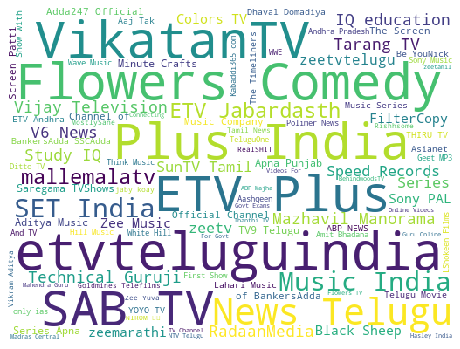

In [41]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384,max_words = 100
                         ).generate(" ".join(df["channel_title"]))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

plt.show()

In [15]:
import sys
print(sys.executable)

c:\users\rajvenka1\appdata\local\programs\python\python37\python.exe


In [16]:
!c:\users\rajvenka1\appdata\local\programs\python\python37\python -m pip install wordcloud

Could not build wheels for pillow, since package 'wheel' is not installed.
Could not build wheels for numpy, since package 'wheel' is not installed.
Could not build wheels for matplotlib, since package 'wheel' is not installed.
Could not build wheels for cycler, since package 'wheel' is not installed.
Could not build wheels for pyparsing, since package 'wheel' is not installed.
Could not build wheels for kiwisolver, since package 'wheel' is not installed.
Could not build wheels for python-dateutil, since package 'wheel' is not installed.
Could not build wheels for six, since package 'wheel' is not installed.
Could not build wheels for setuptools, since package 'wheel' is not installed.


You should consider upgrading via the 'c:\users\rajvenka1\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [30]:
temp.index.sort_values()

Index(['!', '!!', '!!!', '!hasin', '#', '#1', '#102Movie', '#111', '#111TNR',
       '#114',
       ...
       '‪Prabhu', '‪Urdu', '‪Vijay‬', '‪‪Ileana', '●', '✔', '担担面', '🍎', '💖',
       '😢'],
      dtype='object', length=49084)